# ***Computer Vision Assignment-2 Solution***

## ***Basic Level***

##### ***Step-1: Importing necessary libraries***

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

##### ***Step-2: Setting up the device either GPU or CPU***

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the dataset
])

Using device: cuda


##### ***Step-3: Loading CIFAR-10 dataset***

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [01:47<00:00, 1.58MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


##### ***Step-4: Artificial Neural Network(ANN) classifier***

In [22]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)  # Input layer to hidden layer
        self.fc2 = nn.Linear(512, 256)   # Hidden layer to another hidden layer
        self.fc3 = nn.Linear(256, 10)    # Hidden layer to output layer

    def forward(self, x):
        # TODO: Define forward pass
        x = x.view(-1, 32*32*3)  # Flatten the input image
        x = torch.relu(self.fc1(x))  # First fully connected layer + relu activation
        x = torch.relu(self.fc2(x))  # Second fully connected layer + relu activation
        x = self.fc3(x)  # Output layer
        return x

##### ***Step-5***

In [23]:
model_ann = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ann.parameters(), lr=0.001)

##### ***Step-6: Training Loop***

In [24]:
# Training loop
num_epochs = 10
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels =  labels.to(device)

        # Forward pass
        outputs = model_ann(images)
        loss = criterion(outputs, labels)
        ls_losses.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/782], Loss: 1.9655
Epoch [1/10], Step [200/782], Loss: 1.4611
Epoch [1/10], Step [300/782], Loss: 1.5965
Epoch [1/10], Step [400/782], Loss: 1.7205
Epoch [1/10], Step [500/782], Loss: 1.8609
Epoch [1/10], Step [600/782], Loss: 1.4787
Epoch [1/10], Step [700/782], Loss: 1.4671
Epoch [2/10], Step [100/782], Loss: 1.2873
Epoch [2/10], Step [200/782], Loss: 1.4209
Epoch [2/10], Step [300/782], Loss: 1.6078
Epoch [2/10], Step [400/782], Loss: 1.4813
Epoch [2/10], Step [500/782], Loss: 1.6119
Epoch [2/10], Step [600/782], Loss: 1.4848
Epoch [2/10], Step [700/782], Loss: 1.5688
Epoch [3/10], Step [100/782], Loss: 1.5455
Epoch [3/10], Step [200/782], Loss: 1.2454
Epoch [3/10], Step [300/782], Loss: 1.2511
Epoch [3/10], Step [400/782], Loss: 1.3923
Epoch [3/10], Step [500/782], Loss: 1.2212
Epoch [3/10], Step [600/782], Loss: 1.2402
Epoch [3/10], Step [700/782], Loss: 1.2752
Epoch [4/10], Step [100/782], Loss: 1.4090
Epoch [4/10], Step [200/782], Loss: 1.4280
Epoch [4/10

##### ***Step-7: Plotting losses***

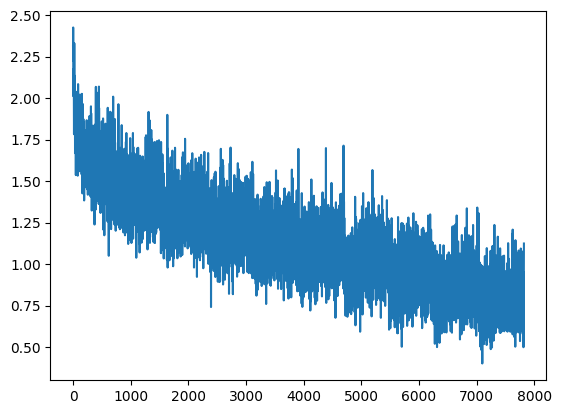

In [25]:
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel = "Sample"
plt.ylabel = "Loss"

##### ***Step-8: Testing the model***

In [26]:
# Test the model
model_ann.eval()
all_preds_ann = []
all_labels_ann = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_ann(images)

        _, predicted = torch.max(outputs.data, 1)
        all_preds_ann.extend(predicted.cpu().numpy())
        all_labels_ann.extend(labels.cpu().numpy())

accuracy_ann = accuracy_score(all_labels_ann, all_preds_ann)
precision_ann = precision_score(all_labels_ann, all_preds_ann, average='weighted')
recall_ann = recall_score(all_labels_ann, all_preds_ann, average='weighted')
f1_ann = f1_score(all_labels_ann, all_preds_ann, average='weighted')

print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(f"ANN Precision: {precision_ann:.4f}")
print(f"ANN Recall: {recall_ann:.4f}")
print(f"ANN F1-Score: {f1_ann:.4f}")

ANN Accuracy: 0.5302
ANN Precision: 0.5325
ANN Recall: 0.5302
ANN F1-Score: 0.5298


##### ***Step-9: Convolutional Neural Network architecture using PyTorch***

In [27]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*8*8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # First conv layer + relu activation + pool
        x = self.pool(torch.relu(self.conv2(x)))  # Second conv layer + relu activation + pool
        x = x.view(-1, 64*8*8)  # Flatten
        x = torch.relu(self.fc1(x))  # Fully connected layer + relu activation
        x = self.fc2(x)  # Output layer
        return x


##### ***Step-10: Training CNN model***

In [28]:
# Initialize the CNN model, loss function, and optimizer
model_cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_cnn(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/782], Loss: 1.5685
Epoch [1/10], Step [200/782], Loss: 1.6031
Epoch [1/10], Step [300/782], Loss: 1.1271
Epoch [1/10], Step [400/782], Loss: 1.3480
Epoch [1/10], Step [500/782], Loss: 1.0652
Epoch [1/10], Step [600/782], Loss: 1.1511
Epoch [1/10], Step [700/782], Loss: 1.0081
Epoch [2/10], Step [100/782], Loss: 0.9440
Epoch [2/10], Step [200/782], Loss: 0.8884
Epoch [2/10], Step [300/782], Loss: 0.8393
Epoch [2/10], Step [400/782], Loss: 0.9413
Epoch [2/10], Step [500/782], Loss: 0.8966
Epoch [2/10], Step [600/782], Loss: 0.6469
Epoch [2/10], Step [700/782], Loss: 0.8231
Epoch [3/10], Step [100/782], Loss: 0.8305
Epoch [3/10], Step [200/782], Loss: 0.4854
Epoch [3/10], Step [300/782], Loss: 0.5700
Epoch [3/10], Step [400/782], Loss: 0.7513
Epoch [3/10], Step [500/782], Loss: 0.5429
Epoch [3/10], Step [600/782], Loss: 0.5390
Epoch [3/10], Step [700/782], Loss: 0.6204
Epoch [4/10], Step [100/782], Loss: 0.5207
Epoch [4/10], Step [200/782], Loss: 0.4329
Epoch [4/10

##### ***Step-11: Testing the CNN model***

In [29]:
# Test the CNN model
model_cnn.eval()
all_preds_cnn = []
all_labels_cnn = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_labels_cnn.extend(labels.cpu().numpy())

accuracy_cnn = accuracy_score(all_labels_cnn, all_preds_cnn)
precision_cnn = precision_score(all_labels_cnn, all_preds_cnn, average='macro')
recall_cnn = recall_score(all_labels_cnn, all_preds_cnn, average='macro')
f1_cnn = f1_score(all_labels_cnn, all_preds_cnn, average='macro')

print(f"CNN Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Precision: {precision_cnn:.4f}")
print(f"CNN Recall: {recall_cnn:.4f}")
print(f"CNN F1-Score: {f1_cnn:.4f}")


CNN Accuracy: 0.7335
CNN Precision: 0.7361
CNN Recall: 0.7335
CNN F1-Score: 0.7338


##### ***Step-12: Making the dataframe for comparing ANN and CNN model***

In [30]:
import pandas as pd

data = {
    'Model': ['ANN', 'CNN'],
    'Accuracy': [0.5302, 0.7335],
    'Precision': [0.5325, 0.7361],
    'Recall': [0.5302, 0.7335],
    'F1-Score': [0.5298, 0.7338]
}

df_comparison = pd.DataFrame(data)
print(df_comparison)

  Model  Accuracy  Precision  Recall  F1-Score
0   ANN    0.5302     0.5325  0.5302    0.5298
1   CNN    0.7335     0.7361  0.7335    0.7338


## ***Advance Level***

##### ***Step-13: Understanding CNN filters***

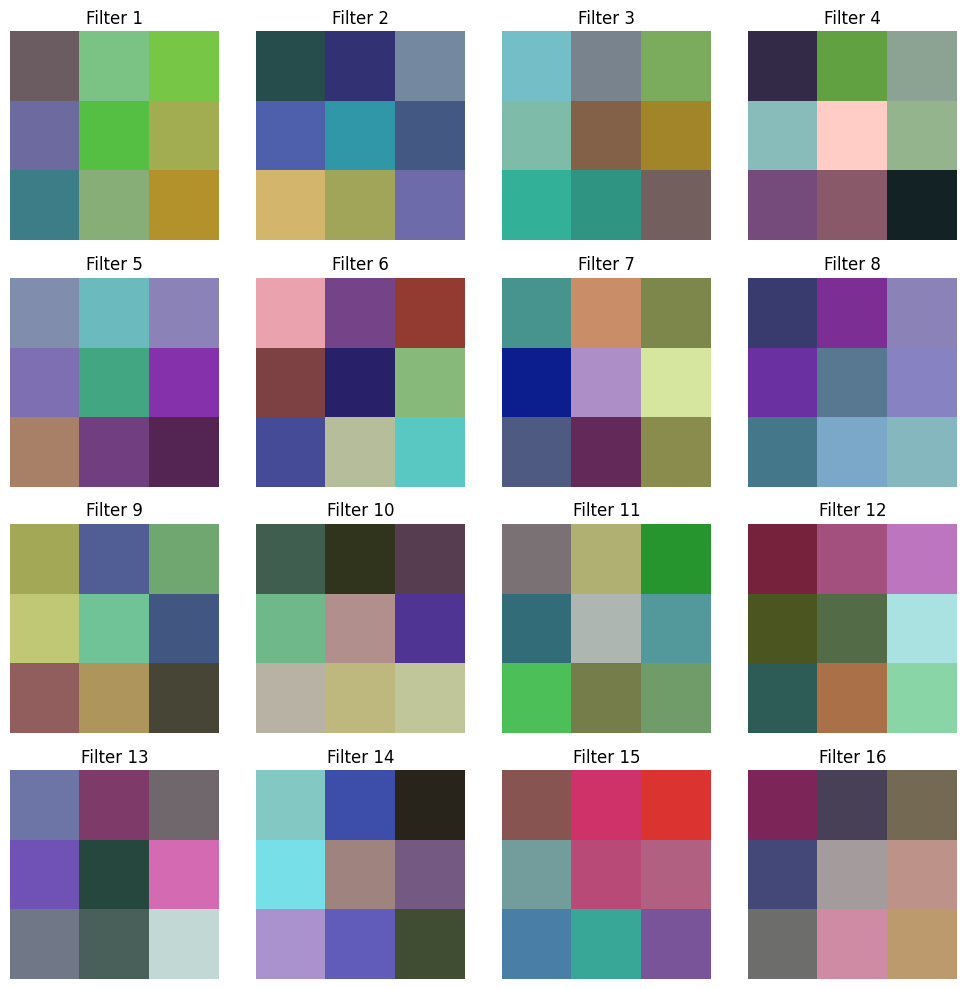

In [31]:
# Visualize filters from the first convolutional layer of the CNN model
first_conv_layer_weights = model_cnn.conv1.weight.data.cpu().numpy()

min_w = first_conv_layer_weights.min()
max_w = first_conv_layer_weights.max()
first_conv_layer_weights = (first_conv_layer_weights - min_w) / (max_w - min_w)

num_filters = first_conv_layer_weights.shape[0]
num_plots = min(num_filters, 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
axes = axes.flatten()

for i in range(num_plots):
    filter_img = first_conv_layer_weights[i].transpose(1, 2, 0)
    axes[i].imshow(filter_img, cmap='gray')
    axes[i].set_title(f'Filter {i+1}')
    axes[i].axis('off')

# Hide unused subplots
for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

##### ***Step-14: Data Augmentation***

In [32]:
# Define data augmentation transformations
train_transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset with data augmentation
train_dataset_augmented = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                      download=True, transform=train_transform_augmented)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform) # Use the original transform for testing

train_loader_augmented = DataLoader(dataset=train_dataset_augmented, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# TODO: Initialize CNN model, loss function, and optimizer
model_cnn_augmented = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_augmented = optim.Adam(model_cnn_augmented.parameters(), lr=0.001)

print("Training CNN with Data Augmentation...")

num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader_augmented):

        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_cnn_augmented(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer_augmented.zero_grad()
        loss.backward()
        optimizer_augmented.step()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader_augmented)}], Loss: {loss.item():.4f}")

Files already downloaded and verified
Files already downloaded and verified
Training CNN with Data Augmentation...
Epoch [1/10], Step [100/782], Loss: 1.8985
Epoch [1/10], Step [200/782], Loss: 1.2191
Epoch [1/10], Step [300/782], Loss: 1.2919
Epoch [1/10], Step [400/782], Loss: 1.4515
Epoch [1/10], Step [500/782], Loss: 1.4454
Epoch [1/10], Step [600/782], Loss: 1.2718
Epoch [1/10], Step [700/782], Loss: 1.3314
Epoch [2/10], Step [100/782], Loss: 1.3573
Epoch [2/10], Step [200/782], Loss: 1.3986
Epoch [2/10], Step [300/782], Loss: 1.0647
Epoch [2/10], Step [400/782], Loss: 1.2142
Epoch [2/10], Step [500/782], Loss: 0.9561
Epoch [2/10], Step [600/782], Loss: 1.1534
Epoch [2/10], Step [700/782], Loss: 1.0478
Epoch [3/10], Step [100/782], Loss: 0.8773
Epoch [3/10], Step [200/782], Loss: 0.7911
Epoch [3/10], Step [300/782], Loss: 0.8247
Epoch [3/10], Step [400/782], Loss: 1.2282
Epoch [3/10], Step [500/782], Loss: 0.8384
Epoch [3/10], Step [600/782], Loss: 1.0040
Epoch [3/10], Step [700/7

##### ***Step-15: Visualize Incorrect Predictions***

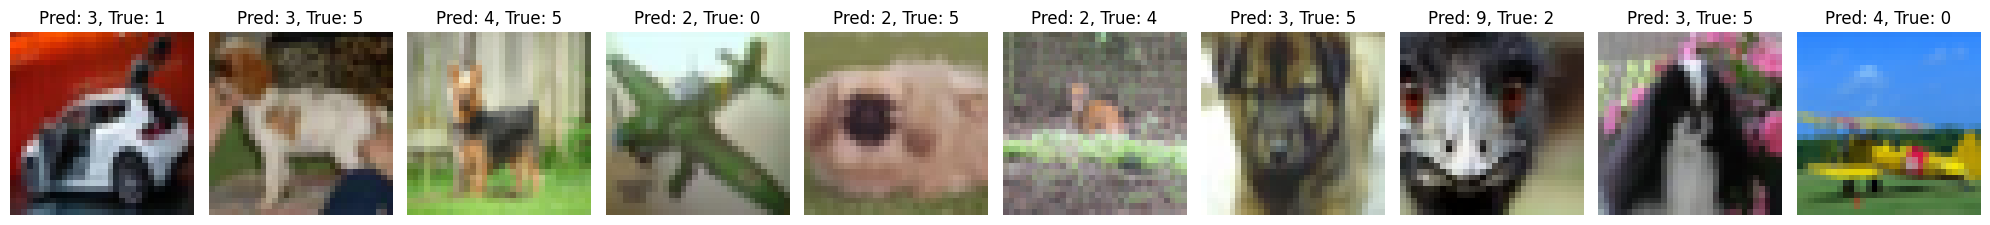

In [33]:
model_to_evaluate = model_cnn_augmented
model_to_evaluate.eval()


incorrect_preds = []
incorrect_labels = []
incorrect_images = []

with torch.no_grad():
    for images, labels in test_loader:
        images_cpu = images.cpu()
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_to_evaluate(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                incorrect_preds.append(predicted[i].item())
                incorrect_labels.append(labels[i].item())
                # Denormalize the image before storing
                img = images_cpu[i].numpy().transpose((1, 2, 0))
                img = 0.5 * img + 0.5 # Denormalize
                img = np.clip(img, 0, 1)
                incorrect_images.append(img)

# Display up to 10 incorrect predictions, add more visualisations if possible
num_to_display = min(len(incorrect_images), 10)
fig, axes = plt.subplots(nrows=1, ncols=num_to_display, figsize=(20, 4))

if num_to_display > 0:
    for i in range(num_to_display):
        axes[i].imshow(incorrect_images[i])
        axes[i].set_title(f'Pred: {incorrect_preds[i]}, True: {incorrect_labels[i]}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No incorrect predictions to display.")